# Εργαστηριακή Άσκηση 4

Σε αυτό το εργαστήριο κάνουμε περιπάτους. Συγκεκριμένα θα υπολογίσουμε χρόνους διαφυγής για διάφορους περιπάτους στον $\mathbb{Z}$ και $\mathbb{Z}^2$.

Στα πλαίσια του εργαστηρίου θα χρησιμοποιήσουμε τις παρακάτω βιβλιοθήκες.

In [3]:
import numpy as np
from numpy.random import choice

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

## Απλός Συμμετρικός περίπατος στον $\mathbb{Z}$

Για τον απλό συμμετρικό περίπατο στον $\mathbb{Z}$ δεν θα χρησιμοποιήσουμε τη γνωστή βιβλιοθήκη `simple_markov_chain_lib` αλλά θα υλοποιήσουμε μια αλυσίδα εξ αρχής καθώς είναι αρκετά απλό.

Για να υλοποιήσουμε μια μαρκοβιανή αλυσίδα χρειαζόμαστε (κατ' ελάχιστο) 2 πράγματα:

1. Μία μεταβλητή για να αποθηκεύσουμε την παρούσα κατάσταση
2. Μία "συνάρτηση" που να μας δίνει την επόμενη κατάσταση, η οποία μπορεί να εξαρτάται από την παρούσα κατάσταση και τον χρόνο.

Στο παρακάτω κελί κώδικα υλοποιούμε τον απλό συμμετρικό τυχαίο περίπατο για 10 βήματα.

In [4]:
np.random.seed(2017)  # for reproducibility

x = 0  # current state of MC
steps = [-1, 1]
probs = [0.5, 0.5]

for n in range(10):
    x += choice(steps, p=probs)  # select 1 step at random
    print(x)
    

-1
0
-1
-2
-1
0
-1
-2
-3
-4


Η μεταβλητή `x` αποθηκεύει την υπάρχουσα κατάσταση ξεκινώντας από το 0. Σε κάθε επανάληψη προσθέτουμε ένα από τα 2 πιθανά βήματα (αριστερά ή δεξία) με ίση πιθανότητα.

Η συνάρτηση `choice` διαλέgει ένα από τα 2 πιθανά βήματα (`steps`) με πιθανότητα (`p=probs`). Για την περίπτωση που όλα τα ενδεχόμενα είναι ισοπίθανα το `p` μπορεί να παραλειφθεί αλλά εδώ το προσθέτουμε για πληρότητα. Ως συνήθως μπορείτε να δείτε αναλυτικά τις οδηγίες για κάθε συνάρτηση χρησιμοποιώντας το **`?`**

In [5]:
choice?

## Python - Generators

Για ευκολία (και λιγότερο γράψιμο) θα υλοποιήσουμε τον περίπατο σαν "συνάρτηση-γεννήτρια" (`generator`). 
Μία συνάρτηση-γεννήτρια λειτουργεί όπως μια κανονική συνάρτηση με μόνη διαφορά ότι 
"θυμάται" την προηγούμενη κατάσταση της.

Το προηγούμενο παράδειγμα με χρήση γεννήτριας γράφεται ως:


In [11]:
np.random.seed(2017)  # same results are previous run

# random walk generator:
def rand_walk_Z(start = 0, probs = (0.5, 0.5)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!

walker = rand_walk_Z()  # start a new markov chain
for n in range(10):
    x = next(walker)  # take 1 step!
    print(x)


-1
0
-1
-2
-1
0
-1
-2
-3
-4


Η εντολή

`walker = rand_walk_Z()` 

δημιουργεί μια καινούργια αλυσίδα. Η αλυσίδα είναι στην αρχική κατάσταση και περιμένει να προχωρήσει.
Όταν δώσουμε την εντολή

`x = next(walker)`

Η Python τρέχει τον κώδικα μέχρι να βρει την εντολή **`yield`** και επιστρέφει την μεταβλητή x.

Μια κανονική συνάρτηση θα σταματούσε και θα "εξαφανιζόταν" σε αυτό το σημείο, την επόμενη φορά που θα την καλούσατε θα ξανάρχιζε από την αρχή. Αλλά επειδή χρησιμοποιήσαμε το `yield` η Python καταλαβαίνει ότι η συνάρτηση `rand_walk_Z` δεν είναι κανονική συνάρτηση αλλά *συνάρτηση-γεννήτρια*!

Επομένως, την επόμενη φορά που θα καλέσουμε την συνάρτηση με το `next` η εκτέλεση θα συνεχίσει από το `yield` (το σημείο που είχε σταματήσει). Επειδή έχουμε βάλει το `yield` μέσα σε *infinite loop*  (`while True`) η Python θα συνεχίζει να μας γυρίζει τιμές όσες φορές και αν προχωρήσουμε (`next`) την αλυσίδα (γι' αυτό λέγεται γεννήτρια).

Στη συνέχεια αυτού του εργαστηρίου θα κάνουμε χρήση γεννητριών για να προσομοιώσουμε τους περιπάτους αλλά **εσείς μπορείτε να λύσετε τις ασκήσεις είτε με γεννήτριες είτε με βρόχους `for`.**

### Εφαρμογή: Χρόνος Διαφυγής από Διάστημα

Σε αυτή την πρώτη εφαρμογή θα προσομοιώσουμε τον απλό συμμετρικό περίπατο μέχρι να βγει από ένα διάστημα $[a,b]$.


Το παρακάτω κελί κώδικα υλοποιεί αυτή τη περίπτωση και οπτικοποιεί το αποτέλεσμα με ένα γράφημα χρόνου-θέσης για 3 διαφορετικούς περιπάτους

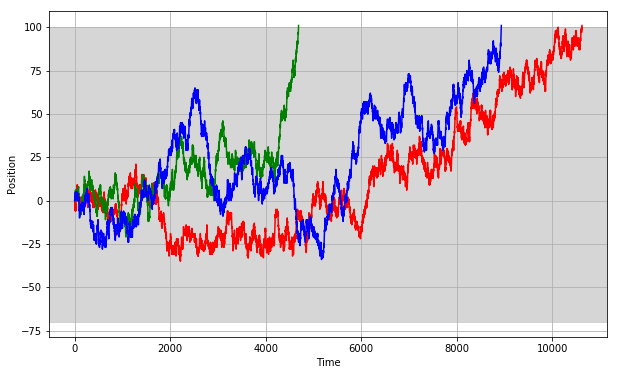

In [20]:
fig, ax = plt.subplots()  # initiate plots

a = -70  # lower boundary
b = 100  # upper boundary

for col in ['red', 'green', 'blue']:  # 3 random walks r-ed, g-reen, b-lue
    walker = rand_walk_Z()  # start new symmetric walk from 0
    x = 0  # start position 0
    chain = [x]  # save positions to plot
    while a <= x <= b:
        x = next(walker)
        chain.append(x)
    ax.plot(chain, color=col)

# To look nicer
plt.axhspan(a, b, color = '#cccccc', alpha = 0.8)  # box between a & b
ax.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')

# Show image!
plt.show()

Δοκιμάστε να ξανατρέξετε το προηγούμενο κελί για `a=-70` και `b=100`.
Αυτό που βλέπετε αρχίζει να μοιάζει με μονοπάτια της κίνησης Brown που γνωρίσαμε
στην αρχή του μαθήματος (Αν θέλετε να μάθετε γιατί, αναζητήστε στην Wikipedia το λήμμα 
Donsker's invariance principle).

#### Παρατηρήσεις 

Η εντολή **`plt.plot`** παίρνει πολλές παραμέτρους.
Ως συνήθως μπορείτε να τις δείτε με το **?** (επόμενο κελί).
Δύο από τις πιο χρήσιμες είναι οι:

1. `color`: καθορίζει το χρώμα
2. `linetype` ή `lty`: καθορίζει το είδος

Δείτε το documentation για λεπτομέριες.

In [ ]:
plt.plot?

## Τυχαίος περίπατος στον $\mathbb{Z}^2$

Για να υλοποιήσουμε τον τυχαίο περίπατο στο $\mathbb{Z}^2$ πρέπει να δημιουργήσουμε μια νέα γεννήτρια. Στο παρακάτω κελί σας δίνουμε την `rand_walk_Z2`.

Η λογική είναι η ίδια με την `rand_walk_Z` απλά αυτή τη φορά:

* χρησιμοποιούμε 2 μεταβλητές `x, y` για να προσδιορίσουμε τη θέση
* η `steps` είναι μια λίστα από πίνακες που παριστάνουν τις δυνατές μετατοπίσεις
* Σε κάθε επανάληψη διαλέγουμε ένα στοιχείο της `steps` και το προσθέτουμε στα `x` και `y` αντίστοιχα

In [12]:
# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y

## Εφαρμογή: Χρόνος Διαφυγής από Δίσκο

Για να εξοικειωθούμε με τη συνάρτηση θα υλοποιήσουμε τον απλό συμμετρικό περίπατο στον $\mathbb{Z}^2$ μέχρι να βγούμε από τον δίσκο ακτίνας $r = 20$.

Το παρακάτω κελί κώδικα προσομοιώνει αυτή την αλυσίδα 3 φορές.

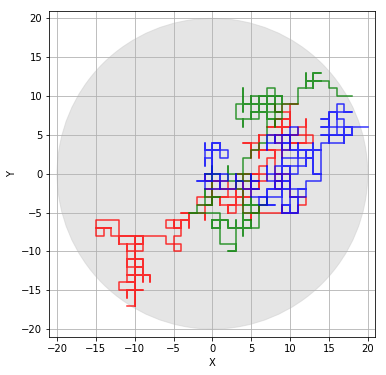

In [13]:
fig, ax = plt.subplots()  # initiate plots

r = 20  # radius of circle boundary
r2 = r**2  # square of radius

for c in 'rgb':  # 3 random walks r-ed, g-reen, b-lue, 1st loop c=r, 2nd loop c=g, 3rd loop c=b 
    x, y = 0, 0  # start position 0
    X, Y = [0], [0]  # store positions
    walker = rand_walk_Z2()  # start new symmetric walk from 0, 0
    while x**2 + y**2 < r2:
        x, y = next(walker)
        X.append(x)
        Y.append(y)
    #X = np.array(X) + np.random.randn(len(X))/3
    #Y = np.array(Y) + np.random.randn(len(Y))/3
    ax.plot(X, Y, color=c, alpha = 0.8)

# To look nicer
circle = plt.Circle((0, 0), r, color="#cccccc", alpha=0.5)
ax.add_artist(circle)  # draw a circle
ax.set_xlim([-r-1, r+1])
ax.set_ylim([-r-1, r+1])
ax.set_aspect('equal')  # set aspect ratio 1:1
ax.grid()  # adds grid lines
plt.xlabel('X')
plt.ylabel('Y')

# To Show image!
plt.show()

Η παράμετρος `alpha` κάνει τις γραμμές πιο διαφανείς ώστε να γίνονται λίγο πιο εμφανείς οι περιοχές που η αλυσίδα επισκέφτηκε πολλές φορές.

## Εφαρμογή: Κατανομή χρόνου εξόδου

Στη συνέχεια θα προσομοιώσουμε την αλυσίδα για `Ν = 1.000` φορές.
Για κάθε προσομοίωση θα αποθηκεύσουμε το χρόνο που χρειάστηκε η αλυσίδα για να βγεί για πρώτη φορά από τον δίσκο.

In [19]:
r = 20  # radius of circle boundary
r2 = r**2  # square of radius

N = 1000  # sample size
escape_time = np.zeros(N, dtype=int)  # to store the exit time
for n in range(N):
    walker = rand_walk_Z2()
    x, y = (0, 0)
    t = 0
    while x**2 + y**2 < r2:
        x, y = next(walker)
        t += 1
    escape_time[n] = t

Τώρα που έχουμε N=1000 τυχαία δείγματα του χρόνου εξόδου μπορούμε να δούμε μια εκτίμηση της κατανομής του, σχεδιάζοντας το ιστόγραμμα των τιμών του στο δείγμα μας.

Στο παρακάτω κελί κώδικα σχεδιάζουμε αυτό το ιστόγραμμα χρησιμοποιώντας διαιρώντας το εύρος τιμών του `escape_time` σε 30 περιοχές (`bin=30`).

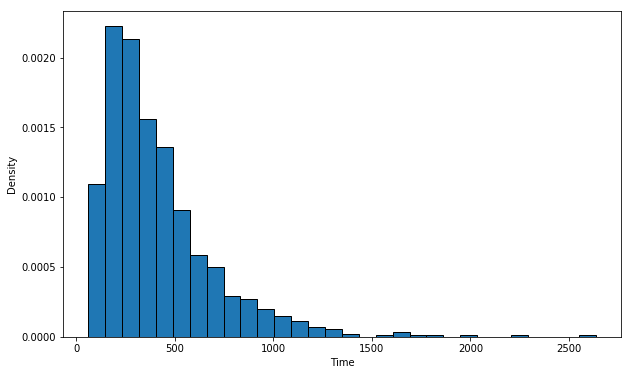

In [18]:
plt.hist(escape_time, bins=30, edgecolor='black', density=True)
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

Η παράμετρος `normed=True` δηλώνει ότι θέλουμε την πυκνότητα πιθανότητας και όχι τη συχνότητα κάθε περιοχής τιμών.

# Παραδοτέα

Οι ασκήσεις που δίνονται μπορεί να απαιτούν μερικά δευτερόλεπτα για να τρέξουν ακόμα και αν τις έχετε γράψει σωστά.
Αν οι χρόνοι αναμονής είναι μεγάλοι καλό είναι να δοκιμάσετε τον κώδικα σας για ένα μικρό αριθμό δειγμάτων (πχ 100) και αφού σιγουρευτείτε ότι είναι σωστός τότε να τρέξετε τον αριθμό δειγμάτων που ζητάει η άσκηση.

## Άσκηση 1

Για τον απλό τυχαίο περίπατο, μέχρι αυτός να βγει από το $[-70, 100]$ προσομοιώστε:

* 500 διαδρομές με τάση προς τα αριστερά $p(k, k+1) = \frac{1}{5}, p(k,k-1) = \frac{4}{5}$
* 500 διαδρομές με τάση προς τα δεξιά $p(k, k+1) = \frac{4}{5}, p(k,k-1) = \frac{1}{5}$

### Ερώτηση 1:

* Σχεδιάστε τις 1000 διαδρομές σε ένα γράφημα χρόνου-θέσης.
* Αυτές που έχουν τάση προς τα αριστερά με κόκκινο χρώμα και αυτές που έχουν τάση προς τα δεξιά με μπλέ 
* Σχολιάστε το αποτέλεσμα

### Ερώτηση 2:

* Σχεδιάστε το ιστόγραμμα των χρόνων εξόδου για τις δύο περιπτώσεις σε ένα κοινό γράφημα.
* Το ιστόγραμμα που αντιστοιχεί στην αλυσίδα με τάση δεξιά να είναι μπλέ και το άλλο κόκκινο (όπως πριν)

### Hints:

* Αν χρησιμοποιήσετε τις συναρτήσεις γεννήτριας που δόθηκαν μπορείτε μέσω του probs να ρυθμίσετε τις πιθανότητες μετάβασης
* Χρησιμοποιείστε την παράμετρο `alpha` και στο `plot` και στο `hist` ώστε να κάνετε τα αντικείμενα διαφανή και να φανεί καλύτερα τυχόν αλληλοεπικάλυψη.

## Άσκηση 2:

Δημιουργήστε μία αλυσίδα που να κινείται στον $\mathbb{Z}_+$ με πιθανότητες μετάβασης:

* Για $k > 0$: $p(k, k+1) = \frac{1}{3}$ και $p(k, k-1) = \frac{2}{3}$
* Για $k = 0$: $p(0, 1) = \frac{1}{3}$ και $p(0, 0) = \frac{2}{3}$

Προσομοιώστε την αλυσίδα `1000` φορές.

### Ερώτηση 1:

Σχεδιάστε το ιστόγραμμα της θέσης $x_{100}$ όπου βρίσκεται η αλυσίδα μετά το εκατοστό βήμα της.

### Ερώτηση 2:

Έστω:

$$ M_n = \max_{0\le k\le n} X_k$$

η δεξιότερη θέση που φτάνει η αλυσίδα στα $n$ πρώτα της βήματα.

1. Κάντε ιστόγραμμα της κατανομής της $M_{1000}$
2. Υπολογίστε τη μέση τιμή και τη διασπορά της.


## Άσκηση 3

Για τον τυχαίο περίπατο στο $\mathbb{Z}^2$

Προσομοιώστε 500 αλυσίδες και υπολογίστε το μέσο χρόνο που κάνει μια αλυσίδα για να βγει από τον δίσκο ακτίνας:

$$ R = 10, 20, ..., 100 $$

* Φτιάξτε ένα διάγραμμα $R$ - χρόνου εξόδου σε λογαριθμική κλίμακα.
* Σχολιάστε τη σχέση των 2 μεταβλητών

Στη συγκεριμένη άσκηση εκτός από μικρότερο αριθμό δειγμάτων είναι καλό να δοκιμάσετε τον κώδικα σας και για μικρά (~50) R στην αρχή καθώς η αλυσίδα μπορεί να χρειαστεί αρκετό χρόνο να ξεφύγει για μεγάλα R.